In [1]:
import os
import sys
#from object_detection.utils import label_map_util
#from object_detection.utils import visualization_utils as vis_util
import cv2
import numpy as np
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

c:\users\manthan\anaconda3\envs\tfod\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\manthan\anaconda3\envs\tfod\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\manthan\anaconda3\envs\tfod\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\manthan\anaconda3\envs\tfod\lib\site-packages\tensorflow\pyth

In [2]:

PATH_TO_CKPT = r'C:\Users\Manthan\Desktop\TFOD\models\research\inference_graph\frozen_inference_graph.pb'      #os.path.join(CWD_PATH, MODEL_NAME, 'frozen_inference_graph.pb')
            # Path to label map file
PATH_TO_LABELS = r'C:\Users\Manthan\Desktop\TFOD\models\research\training\labelmap.pbtxt' #os.path.join(CWD_PATH, 'research/data', 'labelmap.pbtxt')
            #self.PATH_TO_LABELS = "data/labelmap.pbtxt"
            # Path to images
PATH_TO_IMAGE =  r'C:\Users\Manthan\Desktop\TFOD\models\research\images\img1.png'     #os.path.join(CWD_PATH, 'research', self.IMAGE_NAME)
print(PATH_TO_IMAGE)
            # Number of classes the object detector can identify
NUM_CLASSES = 2

            # Load the label map.
            # Label maps map indices to category names, so that when our convolution
            # network predicts `5`, we know that this corresponds to `king`.
            # Here we use internal utility functions, but anything that returns a
            # dictionary mapping integers to appropriate string labels would be fine
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map,max_num_classes=NUM_CLASSES,use_display_name=True)
category_index = label_map_util.create_category_index(categories)
class_names_mapping = {
                1: "without_mask",2:"with_mask"
            }
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

            # Define input and output tensors (i.e. data) for the object detection classifier

            # Input tensor is the image
image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')

            # Output tensors are the detection boxes, scores, and classes
            # Each box represents a part of the image where a particular object was detected
detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')

            # Each score represents level of confidence for each of the objects.
            # The score is shown on the result image, together with the class label.
detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')

            # Number of objects detected
num_detections = detection_graph.get_tensor_by_name('num_detections:0')


C:\Users\Manthan\Desktop\TFOD\models\research\images\img1.png



In [3]:
def getPrediction():
        # Load the Tensorflow model into memory.
        # Load image using OpenCV and
        # expand image dimensions to have shape: [1, None, None, 3]
        # i.e. a single-column array, where each item in the column has the pixel RGB value
    sess = tf.Session(graph=detection_graph)
    image = cv2.imread(PATH_TO_IMAGE)
    image_expanded = np.expand_dims(image, axis=0)
        # Perform the actual detection by running the model with the image as input
    (boxes, scores, classes, num) = sess.run(
            [detection_boxes, detection_scores, detection_classes, num_detections],
            feed_dict={image_tensor: image_expanded})

    result = scores.flatten()
    res = []
    for idx in range(0, len(result)):
        if result[idx] > .40:
            res.append(idx)

    top_classes = classes.flatten()
        # Selecting class 2 and 3
        # top_classes = top_classes[top_classes > 1]
    res_list = [top_classes[i] for i in res]

    class_final_names = [class_names_mapping[x] for x in res_list]
    top_scores = [e for l2 in scores for e in l2 if e > 0.30]
        # final_output = list(zip(class_final_names, top_scores))

        # print(final_output)

        # new_classes = classes.flatten()
    new_scores = scores.flatten()

    new_boxes = boxes.reshape(300, 4)

        # get all boxes from an array
    max_boxes_to_draw = new_boxes.shape[0]
        # this is set as a default but feel free to adjust it to your needs
    min_score_thresh = .30
        # iterate over all objects found
        # boundingBox = {}
        # for i in range(min(max_boxes_to_draw, new_boxes.shape[0])):
        #     if new_scores is None or new_scores[i] > min_score_thresh:
        #         boundingBox[class_final_names[i]] = new_boxes[i]
        #         print("Bounding Boxes of", class_final_names[i], new_boxes[i])

    listOfOutput = []
    for (name, score, i) in zip(class_final_names, top_scores, range(min(max_boxes_to_draw, new_boxes.shape[0]))):
        valDict = {}
        valDict["className"] = name
        valDict["confidence"] = str(score)
        if new_scores is None or new_scores[i] > min_score_thresh:
            val = list(new_boxes[i])
            valDict["yMin"] = str(val[0])
            valDict["xMin"] = str(val[1])
            valDict["yMax"] = str(val[2])
            valDict["xMax"] = str(val[3])
            listOfOutput.append(valDict)
        # new_boxes = boxes.reshape(100,4)
        # print(new_boxes)
        # print(type(new_boxes))
        # print(new_boxes.shape)
        # print(boxes.shape)
        # Draw the results of the detection (aka 'visulaize the results')

    vis_util.visualize_boxes_and_labels_on_image_array(
            image,
            np.squeeze(boxes),
            np.squeeze(classes).astype(np.int32),
            np.squeeze(scores),
            category_index,
            use_normalized_coordinates=True,
            line_thickness=8,
            min_score_thresh=0.60)
    output_filename = 'output4.jpg'
    #cv2.imshow('',image)
    cv2.imwrite(output_filename, image)
    return listOfOutput, image

In [4]:
result, img = getPrediction()

TypeError: int() argument must be a string, a bytes-like object or a number, not 'NoneType'

In [ ]:
print(len(result))

In [ ]:
def cropped_img(img,result):
    height = img.shape[0]
    width = img.shape[1]
    
    ymin = float(result[0]['yMin'])
    xmin = float(result[0]['xMin'])
    ymax = float(result[0]['yMax'])
    xmax = float(result[0]['xMax'])
    y1 = int(ymin*height)
    y2 = int(ymax*height)
    x1 = int(xmin*width)
    x2 = int(xmax*width)
    #print('Y-Min:',ymin,'\nX-Min:',xmin,'\nY-Max:',ymax,'\nX-Max:',xmax,'\nWidth:',width,'\nHeight:',height)

    new_img = img[y1:y2,x1:x2]
    #cv2.imwrite('output.png',new_img)
    plt.imshow(new_img)
    plt.savefig('output.png')
    print("Image Saved")

In [ ]:
import tensorflow.keras 
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

def model_predict(image_path, model_path):
    saved_model = load_model(model_path,compile=False)
    img = image.load_img(image_path, target_size=(150, 150))
    #image = cv2.resize(img)
    # Preprocessing the image
    x = image.img_to_array(img,dtype='double')
    
    x=x/255
    x = np.expand_dims(x, axis=0)
    #x = preprocess_input(x)

    preds = saved_model.predict_classes(x)
    
    if preds==0:
        Output = "Manthan"
    elif preds==1:
        Output= "Unknown"
    print(Output)
        
    return Output
        

img_path = r'C:\Users\Manthan\Desktop\TFOD\models\research\output.png'
model_predict(img_path,'best_model.h5')

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
#new_img = new[x]
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
print(img_rgb.shape[0])

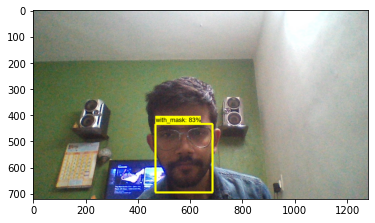

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline
#new_img = new[x]
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

In [20]:


default_func(ckpt_path,label_path,img_path,n_classes)

    


TypeError: default_func() takes 0 positional arguments but 4 were given

In [46]:
result,img = getPrediction()


NameError: name 'getPrediction' is not defined

In [137]:
import os
import sys
import traceback
import cv2
import numpy as np
import datetime
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np


class MultiClassObj:
    def __init__(self, imagePath):
        # This is needed since the notebook is stored in the object_detection folder.
        
        self.PATH_TO_CKPT = r'E:\I-Neuron\My-Projects\Mask-Detection\faster_rcnn_inception_v2_coco\frozen_inference_graph.pb'
        # Path to label map file
        self.PATH_TO_LABELS = r'E:\I-Neuron\My-Projects\Mask-Detection\research\data\labelmap.pbtxt'
        #self.PATH_TO_LABELS = "data/labelmap.pbtxt"
        # Path to images
        self.PATH_TO_IMAGE = imagePath
        print(self.PATH_TO_IMAGE)
        # Number of classes the object detector can identify
        self.NUM_CLASSES = 2

        # Load the label map.
        # Label maps map indices to category names, so that when our convolution
        # network predicts `5`, we know that this corresponds to `king`.
        # Here we use internal utility functions, but anything that returns a
        # dictionary mapping integers to appropriate string labels would be fine
        self.label_map = label_map_util.load_labelmap(self.PATH_TO_LABELS)
        self.categories = label_map_util.convert_label_map_to_categories(self.label_map,
                                                                         max_num_classes=self.NUM_CLASSES,
                                                                         use_display_name=True)
        self.category_index = label_map_util.create_category_index(self.categories)
        self.class_names_mapping = {
            1: "without_mask",2:"with_mask"
        }
        self.detection_graph = tf.Graph()
        with self.detection_graph.as_default():
            od_graph_def = tf.GraphDef()
            with tf.gfile.GFile(self.PATH_TO_CKPT, 'rb') as fid:
                serialized_graph = fid.read()
                od_graph_def.ParseFromString(serialized_graph)
                tf.import_graph_def(od_graph_def, name='')

        # Define input and output tensors (i.e. data) for the object detection classifier

        # Input tensor is the image
        self.image_tensor = self.detection_graph.get_tensor_by_name('image_tensor:0')

        # Output tensors are the detection boxes, scores, and classes
        # Each box represents a part of the image where a particular object was detected
        self.detection_boxes = self.detection_graph.get_tensor_by_name('detection_boxes:0')

        # Each score represents level of confidence for each of the objects.
        # The score is shown on the result image, together with the class label.
        self.detection_scores = self.detection_graph.get_tensor_by_name('detection_scores:0')
        self.detection_classes = self.detection_graph.get_tensor_by_name('detection_classes:0')

        # Number of objects detected
        self.num_detections = self.detection_graph.get_tensor_by_name('num_detections:0')

    def getPrediction(self):
        # Load the Tensorflow model into memory.
        # Load image using OpenCV and
        # expand image dimensions to have shape: [1, None, None, 3]
        # i.e. a single-column array, where each item in the column has the pixel RGB value
        sess = tf.Session(graph=self.detection_graph)
        image = cv2.imread(self.PATH_TO_IMAGE)
        image_expanded = np.expand_dims(image, axis=0)
        # Perform the actual detection by running the model with the image as input
        (boxes, scores, classes, num) = sess.run(
            [self.detection_boxes, self.detection_scores, self.detection_classes, self.num_detections],
            feed_dict={self.image_tensor: image_expanded})

        result = scores.flatten()
        res = []
        for idx in range(0, len(result)):
            if result[idx] > .40:
                res.append(idx)

        top_classes = classes.flatten()
        # Selecting class 2 and 3
        # top_classes = top_classes[top_classes > 1]
        res_list = [top_classes[i] for i in res]

        class_final_names = [self.class_names_mapping[x] for x in res_list]
        top_scores = [e for l2 in scores for e in l2 if e > 0.30]
        # final_output = list(zip(class_final_names, top_scores))

        # print(final_output)

        # new_classes = classes.flatten()
        new_scores = scores.flatten()

        new_boxes = boxes.reshape(300, 4)

        # get all boxes from an array
        max_boxes_to_draw = new_boxes.shape[0]
        # this is set as a default but feel free to adjust it to your needs
        min_score_thresh = .60
        # iterate over all objects found
        # boundingBox = {}
        # for i in range(min(max_boxes_to_draw, new_boxes.shape[0])):
        #     if new_scores is None or new_scores[i] > min_score_thresh:
        #         boundingBox[class_final_names[i]] = new_boxes[i]
        #         print("Bounding Boxes of", class_final_names[i], new_boxes[i])

        listOfOutput = []
        for (name, score, i) in zip(class_final_names, top_scores, range(min(max_boxes_to_draw, new_boxes.shape[0]))):
            valDict = {}
            valDict["className"] = name
            
            valDict["confidence"] = str(score)
            if new_scores is None or new_scores[i] > min_score_thresh:
                print(valDict["className"])
                val = list(new_boxes[i])
                valDict["yMin"] = str(val[0])
                valDict["xMin"] = str(val[1])
                valDict["yMax"] = str(val[2])
                valDict["xMax"] = str(val[3])
                listOfOutput.append(valDict)
        # new_boxes = boxes.reshape(100,4)
        # print(new_boxes)
        # print(type(new_boxes))
        # print(new_boxes.shape)
        # print(boxes.shape)
        # Draw the results of the detection (aka 'visulaize the results')

        vis_util.visualize_boxes_and_labels_on_image_array(
            image,
            np.squeeze(boxes),
            np.squeeze(classes).astype(np.int32),
            np.squeeze(scores),
            self.category_index,
            use_normalized_coordinates=True,
            line_thickness=8,
            min_score_thresh=0.60)
        output_filename = 'output(detection).jpg'
        cv2.imwrite('test_images/output/detected/'+output_filename, image)
        #cv2.imshow('image',output_filename)
        
        return listOfOutput, image
    
    
    def cropped_img(self,img,result):
        self.img = img
        self.result = result
        self.height = img.shape[0]
        self.width = img.shape[1]
        self.c = 0
        time = datetime.datetime.now().time()
        header = ("Person","Date","Time")
        filename = 'data.csv'
        data = []
        for i in range(len(self.result)):
            try:
                if((result[i]['className'])=='with_mask'):
                    print("Person with Mask Detected!!")
                    

                elif((result[i]['className'])=='without_mask'):
                    ymin = float(self.result[i]['yMin'])
                    xmin = float(self.result[i]['xMin'])
                    ymax = float(self.result[i]['yMax'])
                    xmax = float(self.result[i]['xMax'])
                    y1 = int(ymin*self.height/1.1)
                    y2 = int(ymax*self.height*1.1)
                    x1 = int(xmin*self.width/1.1)
                    x2 = int(xmax*self.width*1.1)
                    #print('Y-Min:',ymin,'\nX-Min:',xmin,'\nY-Max:',ymax,'\nX-Max:',xmax,'\nWidth:',width,'\nHeight:',height)

                    new_img = self.img[y1:y2,x1:x2]
                    #cv2.imwrite('output.png',new_img)
                    #plt.imshow(new_img)
                    #outfile = '%s/%s.jpg' % ('test_images', 'cropped' + str(datetime.now()))
                    #cv2.imwrite(outfile, new_img)
                    self.file = 'test_images/output/cropped/output(cropped)'+str(self.c)+'.png'
                    cv2.imwrite(self.file,new_img)
                    print("Image Saved")
                    
                    #outfile = '%s/%s.jpg' % (self.tgtdir, self.basename + str(datetime.now()))
                    global op 
                    op = self.model_predict()
                    
                    
                    data.append((op,datetime.datetime.now().date(),time))        
            except Exception:
                traceback.print_exc()
        
        self.writer(header,data,filename)
        #return op            
                
        
    def model_predict(self):
        import glob
        
        self.image_path = 'test_images/output/cropped/output(cropped)'+str(self.c)+'.png'
        self.img_model_path = 'best_model.h5'

        saved_model = load_model(self.img_model_path,compile=False)
        img = image.load_img(self.image_path, target_size=(150, 150))
        #image = cv2.resize(img)
        # Preprocessing the image
        x = image.img_to_array(img,dtype='double')

        x=x/255
        x = np.expand_dims(x, axis=0)
        #x = preprocess_input(x)

        preds = saved_model.predict_classes(x)

        if preds==0:
            self.Output = "Manthan"
        elif preds==1:
            self.Output= "Unknown"
        print(self.Output)

        t_img = cv2.imread(self.image_path)
        t_img = cv2.putText(t_img, "O/P : " + str(self.Output), (20, 20),cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 4)

        cv2.imwrite('test_images/output/final_images/output(final)'+str(self.c)+'.png',t_img)
        #cv2.imwrite('test_images/output/output(final).jpg',t_img)
        self.c = self.c+1

        return self.Output
        
    def writer(self,header, data, filename):
        import csv
        with open (filename, "w", newline = "") as csvfile:
            self.movies = csv.writer(csvfile)
            self.movies.writerow(header)
            for x in data:
                self.movies.writerow(x)

In [142]:
obj = MultiClassObj(r'E:\I-Neuron\My-Projects\Mask-Detection\test_images\input\t1.jpg')
#result, img = obj.getPrediction()

E:\I-Neuron\My-Projects\Mask-Detection\test_images\input\t1.jpg


In [143]:
result, img = obj.getPrediction()

with_mask
without_mask


In [144]:
obj.cropped_img(img, result)

Person with Mask Detected!!
Image Saved
Unknown


In [145]:
print(result)

[{'className': 'with_mask', 'confidence': '0.9755819', 'yMin': '0.5451528', 'xMin': '0.45495337', 'yMax': '0.7877423', 'xMax': '0.571498'}, {'className': 'without_mask', 'confidence': '0.8899122', 'yMin': '0.14044431', 'xMin': '0.23220216', 'yMax': '0.32369983', 'xMax': '0.34339476'}]


In [ ]:
import datetime
print(datetime.datetime.now().date())
   


In [69]:
saved_model = load_model('image-classification.h5',compile=False)
img = image.load_img('test_images/input/m1.jpg', target_size=(150, 150))
        #image = cv2.resize(img)
        # Preprocessing the image
x = image.img_to_array(img,dtype='double')

x=x/255
x = np.expand_dims(x, axis=0)
        #x = preprocess_input(x)

preds = saved_model.predict_classes(x)

if preds==0:
    Output = "Manthan"
elif preds==1:
    Output= "Unknown"
print(Output)

Unknown


In [67]:
import datetime

cap = cv2.VideoCapture(0) 
start_time = datetime.datetime.now()
num_frames = 0   
# Check if camera opened successfully 
if (cap.isOpened()== False):
    print("Error opening video  file") 
   
# Read until video is completed 
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == True:
        cv2.imwrite('frame.png',frame)
        obj = MultiClassObj('frame.png')
        result, img = obj.getPrediction()
        image = cv2.imread(r'E:\I-Neuron\My-Projects\Mask-Detection\test_images\output\detected\output(detection).jpg')
        obj.cropped_img(img, result)
        #obj.model_predict()

        num_frames += 1
        elapsed_time = (datetime.datetime.now() -
                            start_time).total_seconds()
        fps = num_frames / elapsed_time
    
        
    #cv2.putText(image_np, 'FPS:', (20, 50),cv2.FONT_HERSHEY_SIMPLEX, 0.75, (77, 255, 9), 2)
        cv2.putText(image, "FPS : " + str("{0:.2f}".format(fps)), (20, 50),cv2.FONT_HERSHEY_SIMPLEX, 0.75, (77, 255, 9), 2)
        cv2.putText(image, "O/P : " + str(op), (20, 90),cv2.FONT_HERSHEY_SIMPLEX, 0.75, (77, 255, 9), 2)
    
    
    
    
   
    # Display the resulting frame 
        cv2.imshow('Frame', image) 
   
    # Press Q on keyboard to  exit 
        if cv2.waitKey(25) & 0xFF == ord('q'): 
            cv2.destroyAllWindows() 
            cap.release()
            cap.stop()
            break
   


frame.png
without_mask
Image Saved


Traceback (most recent call last):
  File "<ipython-input-62-d82bc38c0ad4>", line 188, in cropped_img
    op = self.model_predict()
  File "<ipython-input-62-d82bc38c0ad4>", line 209, in model_predict
    img = image.load_img(self.image_path, target_size=(150, 150))
AttributeError: 'numpy.ndarray' object has no attribute 'load_img'


frame.png
without_mask
Image Saved


Traceback (most recent call last):
  File "<ipython-input-62-d82bc38c0ad4>", line 188, in cropped_img
    op = self.model_predict()
  File "<ipython-input-62-d82bc38c0ad4>", line 209, in model_predict
    img = image.load_img(self.image_path, target_size=(150, 150))
AttributeError: 'numpy.ndarray' object has no attribute 'load_img'


frame.png
without_mask
Image Saved


Traceback (most recent call last):
  File "<ipython-input-62-d82bc38c0ad4>", line 188, in cropped_img
    op = self.model_predict()
  File "<ipython-input-62-d82bc38c0ad4>", line 209, in model_predict
    img = image.load_img(self.image_path, target_size=(150, 150))
AttributeError: 'numpy.ndarray' object has no attribute 'load_img'


frame.png
without_mask
Image Saved


Traceback (most recent call last):
  File "<ipython-input-62-d82bc38c0ad4>", line 188, in cropped_img
    op = self.model_predict()
  File "<ipython-input-62-d82bc38c0ad4>", line 209, in model_predict
    img = image.load_img(self.image_path, target_size=(150, 150))
AttributeError: 'numpy.ndarray' object has no attribute 'load_img'


frame.png
without_mask
Image Saved


Traceback (most recent call last):
  File "<ipython-input-62-d82bc38c0ad4>", line 188, in cropped_img
    op = self.model_predict()
  File "<ipython-input-62-d82bc38c0ad4>", line 209, in model_predict
    img = image.load_img(self.image_path, target_size=(150, 150))
AttributeError: 'numpy.ndarray' object has no attribute 'load_img'


frame.png
without_mask
Image Saved


Traceback (most recent call last):
  File "<ipython-input-62-d82bc38c0ad4>", line 188, in cropped_img
    op = self.model_predict()
  File "<ipython-input-62-d82bc38c0ad4>", line 209, in model_predict
    img = image.load_img(self.image_path, target_size=(150, 150))
AttributeError: 'numpy.ndarray' object has no attribute 'load_img'


frame.png
without_mask
without_mask
Image Saved


Traceback (most recent call last):
  File "<ipython-input-62-d82bc38c0ad4>", line 188, in cropped_img
    op = self.model_predict()
  File "<ipython-input-62-d82bc38c0ad4>", line 209, in model_predict
    img = image.load_img(self.image_path, target_size=(150, 150))
AttributeError: 'numpy.ndarray' object has no attribute 'load_img'


Image Saved


Traceback (most recent call last):
  File "<ipython-input-62-d82bc38c0ad4>", line 188, in cropped_img
    op = self.model_predict()
  File "<ipython-input-62-d82bc38c0ad4>", line 209, in model_predict
    img = image.load_img(self.image_path, target_size=(150, 150))
AttributeError: 'numpy.ndarray' object has no attribute 'load_img'


frame.png
without_mask
without_mask
Image Saved


Traceback (most recent call last):
  File "<ipython-input-62-d82bc38c0ad4>", line 188, in cropped_img
    op = self.model_predict()
  File "<ipython-input-62-d82bc38c0ad4>", line 209, in model_predict
    img = image.load_img(self.image_path, target_size=(150, 150))
AttributeError: 'numpy.ndarray' object has no attribute 'load_img'


Image Saved


Traceback (most recent call last):
  File "<ipython-input-62-d82bc38c0ad4>", line 188, in cropped_img
    op = self.model_predict()
  File "<ipython-input-62-d82bc38c0ad4>", line 209, in model_predict
    img = image.load_img(self.image_path, target_size=(150, 150))
AttributeError: 'numpy.ndarray' object has no attribute 'load_img'


frame.png
without_mask
with_mask
Image Saved


Traceback (most recent call last):
  File "<ipython-input-62-d82bc38c0ad4>", line 188, in cropped_img
    op = self.model_predict()
  File "<ipython-input-62-d82bc38c0ad4>", line 209, in model_predict
    img = image.load_img(self.image_path, target_size=(150, 150))
AttributeError: 'numpy.ndarray' object has no attribute 'load_img'


Person with Mask Detected!!
frame.png
without_mask
Image Saved


Traceback (most recent call last):
  File "<ipython-input-62-d82bc38c0ad4>", line 188, in cropped_img
    op = self.model_predict()
  File "<ipython-input-62-d82bc38c0ad4>", line 209, in model_predict
    img = image.load_img(self.image_path, target_size=(150, 150))
AttributeError: 'numpy.ndarray' object has no attribute 'load_img'


frame.png
without_mask
Image Saved


Traceback (most recent call last):
  File "<ipython-input-62-d82bc38c0ad4>", line 188, in cropped_img
    op = self.model_predict()
  File "<ipython-input-62-d82bc38c0ad4>", line 209, in model_predict
    img = image.load_img(self.image_path, target_size=(150, 150))
AttributeError: 'numpy.ndarray' object has no attribute 'load_img'


frame.png
with_mask
Person with Mask Detected!!
frame.png
frame.png
frame.png
without_mask
Image Saved


Traceback (most recent call last):
  File "<ipython-input-62-d82bc38c0ad4>", line 188, in cropped_img
    op = self.model_predict()
  File "<ipython-input-62-d82bc38c0ad4>", line 209, in model_predict
    img = image.load_img(self.image_path, target_size=(150, 150))
AttributeError: 'numpy.ndarray' object has no attribute 'load_img'


frame.png
frame.png
without_mask
Image Saved


Traceback (most recent call last):
  File "<ipython-input-62-d82bc38c0ad4>", line 188, in cropped_img
    op = self.model_predict()
  File "<ipython-input-62-d82bc38c0ad4>", line 209, in model_predict
    img = image.load_img(self.image_path, target_size=(150, 150))
AttributeError: 'numpy.ndarray' object has no attribute 'load_img'


frame.png
without_mask
Image Saved


Traceback (most recent call last):
  File "<ipython-input-62-d82bc38c0ad4>", line 188, in cropped_img
    op = self.model_predict()
  File "<ipython-input-62-d82bc38c0ad4>", line 209, in model_predict
    img = image.load_img(self.image_path, target_size=(150, 150))
AttributeError: 'numpy.ndarray' object has no attribute 'load_img'


frame.png
without_mask
Image Saved


Traceback (most recent call last):
  File "<ipython-input-62-d82bc38c0ad4>", line 188, in cropped_img
    op = self.model_predict()
  File "<ipython-input-62-d82bc38c0ad4>", line 209, in model_predict
    img = image.load_img(self.image_path, target_size=(150, 150))
AttributeError: 'numpy.ndarray' object has no attribute 'load_img'


frame.png
with_mask
Person with Mask Detected!!
frame.png
without_mask
Image Saved


Traceback (most recent call last):
  File "<ipython-input-62-d82bc38c0ad4>", line 188, in cropped_img
    op = self.model_predict()
  File "<ipython-input-62-d82bc38c0ad4>", line 209, in model_predict
    img = image.load_img(self.image_path, target_size=(150, 150))
AttributeError: 'numpy.ndarray' object has no attribute 'load_img'


frame.png
without_mask
Image Saved


Traceback (most recent call last):
  File "<ipython-input-62-d82bc38c0ad4>", line 188, in cropped_img
    op = self.model_predict()
  File "<ipython-input-62-d82bc38c0ad4>", line 209, in model_predict
    img = image.load_img(self.image_path, target_size=(150, 150))
AttributeError: 'numpy.ndarray' object has no attribute 'load_img'


frame.png
without_mask
Image Saved


Traceback (most recent call last):
  File "<ipython-input-62-d82bc38c0ad4>", line 188, in cropped_img
    op = self.model_predict()
  File "<ipython-input-62-d82bc38c0ad4>", line 209, in model_predict
    img = image.load_img(self.image_path, target_size=(150, 150))
AttributeError: 'numpy.ndarray' object has no attribute 'load_img'


frame.png
without_mask
Image Saved


Traceback (most recent call last):
  File "<ipython-input-62-d82bc38c0ad4>", line 188, in cropped_img
    op = self.model_predict()
  File "<ipython-input-62-d82bc38c0ad4>", line 209, in model_predict
    img = image.load_img(self.image_path, target_size=(150, 150))
AttributeError: 'numpy.ndarray' object has no attribute 'load_img'


frame.png
without_mask
Image Saved


Traceback (most recent call last):
  File "<ipython-input-62-d82bc38c0ad4>", line 188, in cropped_img
    op = self.model_predict()
  File "<ipython-input-62-d82bc38c0ad4>", line 209, in model_predict
    img = image.load_img(self.image_path, target_size=(150, 150))
AttributeError: 'numpy.ndarray' object has no attribute 'load_img'


frame.png
without_mask
Image Saved


Traceback (most recent call last):
  File "<ipython-input-62-d82bc38c0ad4>", line 188, in cropped_img
    op = self.model_predict()
  File "<ipython-input-62-d82bc38c0ad4>", line 209, in model_predict
    img = image.load_img(self.image_path, target_size=(150, 150))
AttributeError: 'numpy.ndarray' object has no attribute 'load_img'


frame.png
frame.png
without_mask
Image Saved


Traceback (most recent call last):
  File "<ipython-input-62-d82bc38c0ad4>", line 188, in cropped_img
    op = self.model_predict()
  File "<ipython-input-62-d82bc38c0ad4>", line 209, in model_predict
    img = image.load_img(self.image_path, target_size=(150, 150))
AttributeError: 'numpy.ndarray' object has no attribute 'load_img'


frame.png
without_mask
Image Saved


Traceback (most recent call last):
  File "<ipython-input-62-d82bc38c0ad4>", line 188, in cropped_img
    op = self.model_predict()
  File "<ipython-input-62-d82bc38c0ad4>", line 209, in model_predict
    img = image.load_img(self.image_path, target_size=(150, 150))
AttributeError: 'numpy.ndarray' object has no attribute 'load_img'


frame.png
without_mask
Image Saved


Traceback (most recent call last):
  File "<ipython-input-62-d82bc38c0ad4>", line 188, in cropped_img
    op = self.model_predict()
  File "<ipython-input-62-d82bc38c0ad4>", line 209, in model_predict
    img = image.load_img(self.image_path, target_size=(150, 150))
AttributeError: 'numpy.ndarray' object has no attribute 'load_img'


AttributeError: 'cv2.VideoCapture' object has no attribute 'stop'

In [152]:
import glob
a  = os.listdir('./test_images/output/detected/')
mask_detect_imgs = glob.glob('./test_images/output/detected/*')
mask_detect_imgs
a

['output(detection).jpg']

In [154]:
root = 'test_images/output'
a = [os.path.join(root,file) for file in mask_detect_imgs]
a

['test_images/output\\./test_images/output/detected\\output(detection).jpg']

In [2]:
import os
t_list = [os.remove(file) for file in os.listdir('./test_images/output/detected')]
t_list

FileNotFoundError: [WinError 2] The system cannot find the file specified: 'output(detection).jpg'

In [5]:
import glob

files = glob.glob('./test_images/output/detected/*.jpg', recursive=True)
files

['./test_images/output/detected\\output(detection).jpg']

In [13]:
import datetime
print(datetime.datetime.now().time().strftime("%M%S"))

1926


In [14]:
os.path.isfile('data.csv')


True

<img src="E:\I-Neuron\My-Projects\Mask-Detection\test_images\output\detected\output(detection)5539.jpg">